In [10]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Data Scraping
url ="https://en.wikipedia.org/wiki/LVMH"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', {'class': 'wikitable'})
print(table)

headers = []
for th in table.find_all('th'):
    headers.append(th.text.strip())

rows = []
for tr in table.find_all('tr')[1:]:
    cols = tr.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    rows.append(cols)

df = pd.DataFrame(rows, columns=headers)

<table class="wikitable" style="text-align: right;">
<tbody><tr>
<th>Financial data (in million euros)
</th>
<th>2006<sup class="reference" id="cite_ref-lvmh.com_84-0"><a href="#cite_note-lvmh.com-84"><span class="cite-bracket">[</span>84<span class="cite-bracket">]</span></a></sup>
</th>
<th>2007<sup class="reference" id="cite_ref-lvmh.com_84-1"><a href="#cite_note-lvmh.com-84"><span class="cite-bracket">[</span>84<span class="cite-bracket">]</span></a></sup>
</th>
<th>2008<sup class="reference" id="cite_ref-lvmh.com_84-2"><a href="#cite_note-lvmh.com-84"><span class="cite-bracket">[</span>84<span class="cite-bracket">]</span></a></sup>
</th>
<th>2009<sup class="reference" id="cite_ref-lvmh.com_84-3"><a href="#cite_note-lvmh.com-84"><span class="cite-bracket">[</span>84<span class="cite-bracket">]</span></a></sup>
</th>
<th>2010<sup class="reference" id="cite_ref-AR2010_58-2"><a href="#cite_note-AR2010-58"><span class="cite-bracket">[</span>58<span class="cite-bracket">]</span></a></s

In [7]:
# Cleaning Table
df = df.set_index(df.columns[0]).T.reset_index()
df.columns.name = None

df = df.rename(columns={
     df.columns[0]: 'Year',
    'Sales': 'Sales',
    'Net profit (before minority interests)': 'Net Profit',
    'Total equity': 'Total Equity'
})

df['Sales'] = df['Sales'].str.replace(',', '').astype(float)
df['Net Profit'] = df['Net Profit'].str.replace(',', '').astype(float)
df['Total Equity'] = df['Total Equity'].str.replace(',', '').astype(float)

df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(int)

print(df)

    Year    Sales  Net Profit  Total Equity
0   2006  15306.0      2160.0       11594.0
1   2007  16481.0      2331.0       12528.0
2   2008  17193.0      2318.0       13887.0
3   2009  17053.0      1973.0       14785.0
4   2010  20320.0      3032.0       18204.0
5   2011  23659.0      3065.0       23512.0
6   2012  28103.0      3909.0       25666.0
7   2013  29016.0      3947.0       27907.0
8   2014  30638.0      6105.0       23003.0
9   2015  35664.0      4001.0       25799.0
10  2016  37600.0      4363.0       27903.0
11  2017  42636.0      5616.0       30260.0


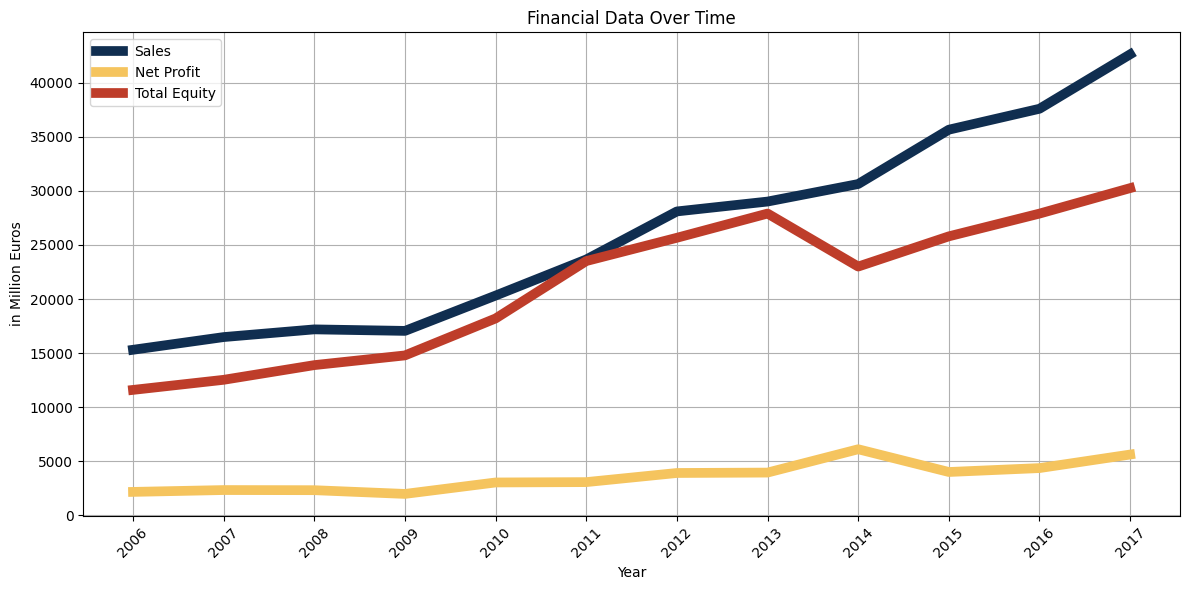

In [8]:
# Plotting: Line Graph

colors = ['#102E50', '#F5C45E', '#BE3D2A']
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Sales'], label='Sales', color=colors[0], lw=7)
plt.plot(df['Year'], df['Net Profit'], label='Net Profit', color=colors[1], lw=7)
plt.plot(df['Year'], df['Total Equity'], label='Total Equity', color=colors[2], lw=7)

plt.title('Financial Data Over Time')
plt.xlabel('Year')
plt.xticks(df['Year'], rotation=45)
plt.ylabel('in Million Euros')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Sales have consistently increased, showing that LVMH has significantly scaled its business over the 12-year period.
The biggest year-over-year growth happened between  2014 and 2015, and 2016 and 2017, where sales increased by around
€5 million.

Net profit, although fluctuating quite a bit, has seen a steady rise, reflecting profitability over time.
Their net profit peaked in 2014.

Total Equity continued to also increase consistently, although it dipped in 2014, but continued to rise after, 
showing strong accumulation of assets and shareholder equity. Higher equity implies LVMH has been able to 
reinvest profits into the business, pay off debts, and build financial reserves, which would support future growth.

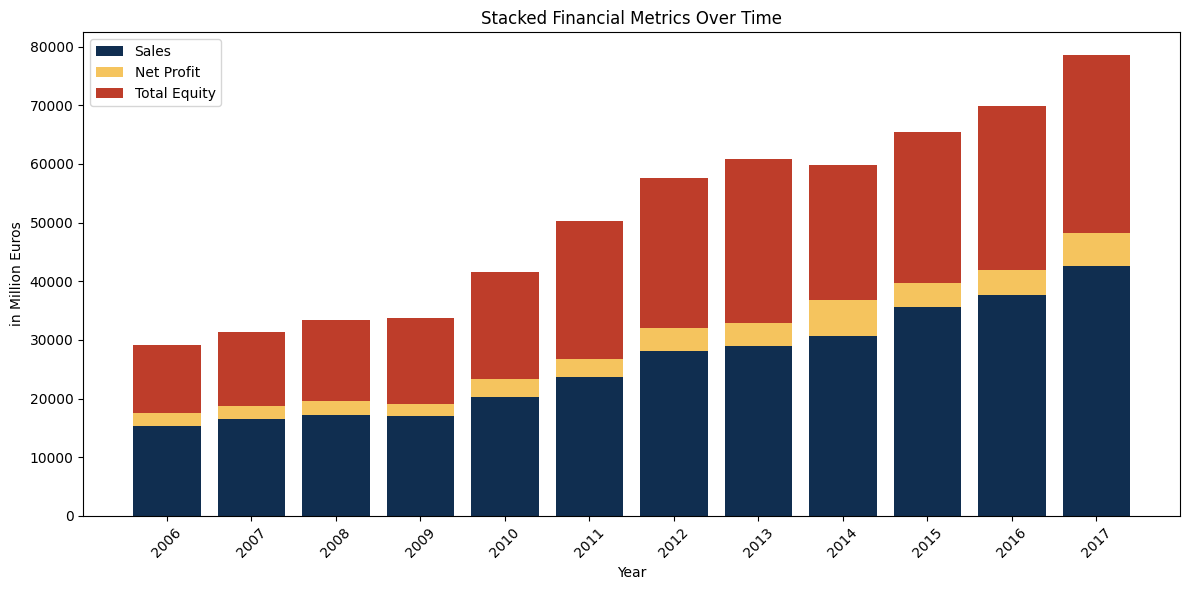

In [9]:
# Plotting: Stacked Bar Chart
x = np.arange(len(df['Year']))
plt.figure(figsize=(12, 6))
colors = ['#102E50', '#F5C45E', '#BE3D2A']
plt.bar(x, df['Sales'], label='Sales', color=colors[0])
plt.bar(x, df['Net Profit'], bottom=df['Sales'], label='Net Profit',color=colors[1])
plt.bar(x, df['Total Equity'], bottom=df['Sales'] + df['Net Profit'], label='Total Equity',color=colors[2])

plt.xticks(x, df['Year'], rotation=45)
plt.xlabel('Year')
plt.ylabel('in Million Euros')
plt.title('Stacked Financial Metrics Over Time')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
Sales remains as the largest section of each bar,  indicating that it consistently makes up the bulk of the company's 
financial growth. LVMH has successfully scaled its operations, growing its market share, product offerings, and overall
revenue year over year, showing a strong and unmatched demand for their products.

Total Equity also continues to gradually increase, although at a slower pace compared to Sales and Net Profit.
The growing equity indicates that LVMH has been successful in reinvesting its profits to expand its asset base and
fund new acquisitions; which can be seen by the numerous brands and subsidiaries currently under the fashion house.